# Petar i vuk: Uvod u učenje pojačanjem

U ovom vodiču naučit ćemo kako primijeniti učenje pojačanjem na problem pronalaženja puta. Postavka je inspirirana glazbenom bajkom [Petar i vuk](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) ruskog skladatelja [Sergeja Prokofjeva](https://en.wikipedia.org/wiki/Sergei_Prokofiev). To je priča o mladom pioniru Petru, koji hrabro izlazi iz svoje kuće na šumsku čistinu kako bi lovio vuka. Trenirat ćemo algoritme strojnog učenja koji će pomoći Petru da istraži okolno područje i izgradi optimalnu kartu za navigaciju.

Prvo, uvezimo nekoliko korisnih biblioteka:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Pregled učenja putem pojačanja

**Učenje putem pojačanja** (RL) je tehnika učenja koja nam omogućuje da naučimo optimalno ponašanje **agenta** u nekom **okruženju** provođenjem mnogih eksperimenata. Agent u ovom okruženju treba imati neki **cilj**, definiran putem **funkcije nagrade**.

## Okruženje

Radi jednostavnosti, razmotrimo Peterov svijet kao kvadratnu ploču veličine `width` x `height`. Svaka ćelija na ovoj ploči može biti:
* **tlo**, po kojem Peter i druga stvorenja mogu hodati
* **voda**, po kojoj očito ne možete hodati
* **stablo** ili **trava** - mjesto gdje se možete odmoriti
* **jabuka**, koja predstavlja nešto što bi Peter rado pronašao kako bi se nahranio
* **vuk**, koji je opasan i treba ga izbjegavati

Za rad s okruženjem definirat ćemo klasu pod nazivom `Board`. Kako ne bismo previše zatrpali ovu bilježnicu, sav kod za rad s pločom premjestili smo u zaseban modul `rlboard`, koji ćemo sada uvesti. Možete pogledati unutar ovog modula za više detalja o unutarnjem funkcioniranju implementacije.


Hajdemo sada stvoriti nasumičnu ploču i vidjeti kako izgleda:


In [4]:
# code block 1

## Akcije i Pravila

U našem primjeru, Petrov cilj bio bi pronaći jabuku, dok izbjegava vuka i druge prepreke. Definirajte te akcije kao rječnik i povežite ih s parovima odgovarajućih promjena koordinata.


In [5]:
# code block 2

Strategija našeg agenta (Petar) definirana je takozvanom **politikom**. Razmotrimo najjednostavniju politiku nazvanu **slučajna šetnja**.

## Slučajna šetnja

Prvo riješimo naš problem implementacijom strategije slučajne šetnje.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Funkcija nagrađivanja

Kako bismo učinili našu politiku inteligentnijom, moramo razumjeti koji su potezi "bolji" od drugih.


In [8]:
#code block 5

## Q-Učenje

Izgradite Q-Tablicu ili višedimenzionalni niz. Budući da naša ploča ima dimenzije `width` x `height`, Q-Tablicu možemo predstaviti numpy nizom oblika `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Proslijedite Q-Tablicu funkciji `plot` kako biste vizualizirali tablicu na ploči:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Suština Q-Learninga: Bellmanova jednadžba i algoritam učenja

Napišite pseudo-kod za naš algoritam učenja:

* Inicijalizirajte Q-Tablicu Q s jednakim vrijednostima za sva stanja i akcije
* Postavite stopu učenja $\alpha\leftarrow 1$
* Ponavljajte simulaciju mnogo puta
   1. Započnite na nasumičnoj poziciji
   1. Ponavljajte
        1. Odaberite akciju $a$ u stanju $s$
        2. Izvršite akciju prelaskom u novo stanje $s'$
        3. Ako naiđemo na uvjet kraja igre ili je ukupna nagrada premala - izađite iz simulacije  
        4. Izračunajte nagradu $r$ u novom stanju
        5. Ažurirajte Q-Funkciju prema Bellmanovoj jednadžbi: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Ažurirajte ukupnu nagradu i smanjite $\alpha$.

## Eksploatacija vs. Istraživanje

Najbolji pristup je balansirati između istraživanja i eksploatacije. Kako više učimo o našem okruženju, vjerojatnije je da ćemo slijediti optimalni put, no povremeno treba odabrati i neistraženi put.

## Implementacija u Pythonu

Sada smo spremni implementirati algoritam učenja. Prije toga, trebamo i funkciju koja će pretvoriti proizvoljne brojeve u Q-Tablici u vektor vjerojatnosti za odgovarajuće akcije:


In [10]:
# code block 7

Dodajemo malu količinu `eps` izvornom vektoru kako bismo izbjegli dijeljenje s 0 u početnom slučaju, kada su sve komponente vektora identične.

Stvarni algoritam učenja koji ćemo pokrenuti za 5000 eksperimenata, također nazvan **epohe**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Nakon izvršavanja ovog algoritma, Q-Tablica bi trebala biti ažurirana vrijednostima koje definiraju privlačnost različitih akcija u svakom koraku. Vizualizirajte tablicu ovdje:


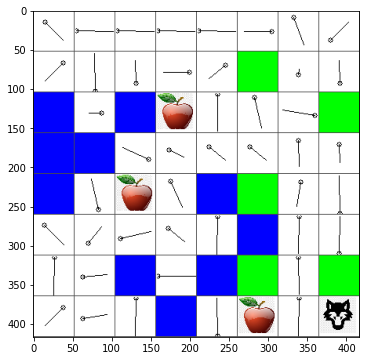

In [43]:
m.plot(Q)

## Provjera politike

Budući da Q-Tablica prikazuje "privlačnost" svake akcije u svakom stanju, vrlo je jednostavno koristiti je za definiranje učinkovitog kretanja u našem svijetu. U najjednostavnijem slučaju, možemo jednostavno odabrati akciju koja odgovara najvećoj vrijednosti u Q-Tablici:


In [13]:
# code block 9

2

Ako pokušate kod iznad nekoliko puta, možda ćete primijetiti da se ponekad jednostavno "zaglavi", i morate pritisnuti gumb STOP u bilježnici kako biste ga prekinuli.

> **Zadatak 1:** Izmijenite funkciju `walk` kako biste ograničili maksimalnu duljinu puta na određeni broj koraka (recimo, 100), i promatrajte kako kod iznad povremeno vraća ovu vrijednost.

> **Zadatak 2:** Izmijenite funkciju `walk` tako da se ne vraća na mjesta na kojima je već bio ranije. Ovo će spriječiti da se `walk` vrti u krug, međutim, agent i dalje može završiti "zarobljen" na lokaciji iz koje ne može pobjeći.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


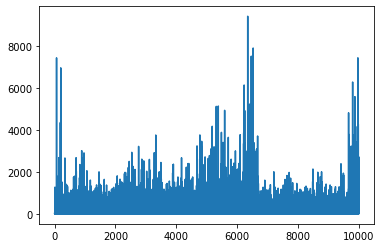

In [57]:
plt.plot(lpath)

## Vježba
## Realističniji svijet Petra i vuka



---

**Odricanje od odgovornosti**:  
Ovaj dokument je preveden korištenjem AI usluge za prevođenje [Co-op Translator](https://github.com/Azure/co-op-translator). Iako nastojimo osigurati točnost, imajte na umu da automatski prijevodi mogu sadržavati pogreške ili netočnosti. Izvorni dokument na izvornom jeziku treba smatrati mjerodavnim izvorom. Za ključne informacije preporučuje se profesionalni prijevod od strane stručnjaka. Ne preuzimamo odgovornost za bilo kakve nesporazume ili pogrešne interpretacije proizašle iz korištenja ovog prijevoda.
